# Visualizing Airport Connections with NetworkX

In [3]:
#add necessary libraries
import networkx as nx #library supporting networks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [43]:
#read in airport location data
cities = pd.read_csv( 'data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [44]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [45]:
#create a dictionary of city locations
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

In [46]:
CityPos

{'Deauville': (0.257, 49.608000000000004),
 'Yibin': (104.90700000000001, 29.333000000000002),
 'Lianyungang': (119.416, 34.916),
 'Castlegar': (-117.38799999999999, 49.493),
 'BRISTOL': (-82.01299999999999, 36.792),
 'Toledo': (-83.68, 41.978),
 'Norman Wells': (-126.664, 65.469),
 'Dammam': (50.32899999999999, 26.785),
 'Paamiut': (-49.438, 62.653),
 'Livingstone': (26.371, -17.703),
 'Lanai': (-156.92, 21.309),
 'Mitu': (-69.72399999999999, 1.422),
 'Bar Harbor': (-67.936, 44.748999999999995),
 'Niamey': (2.306, 13.802),
 'Kittila': (25.410999999999998, 68.168),
 'Edmonton': (-113.3, 53.516000000000005),
 'Caen': (-0.084, 49.288000000000004),
 'Tan Tan': (-10.603, 28.746),
 'Alamosa': (-105.77799999999999, 37.725),
 'Waterloo': (-92.001, 42.928000000000004),
 'Wunnumin Lake': (-88.816, 53.489),
 'Gizan': (42.976000000000006, 17.500999999999998),
 'Bora Bora': (-151.586, -16.074),
 'Zhijiang': (110.166, 27.735),
 'La Chorrera': (-72.362, -0.556),
 'Plattsburgh': (-73.11399999999999, 

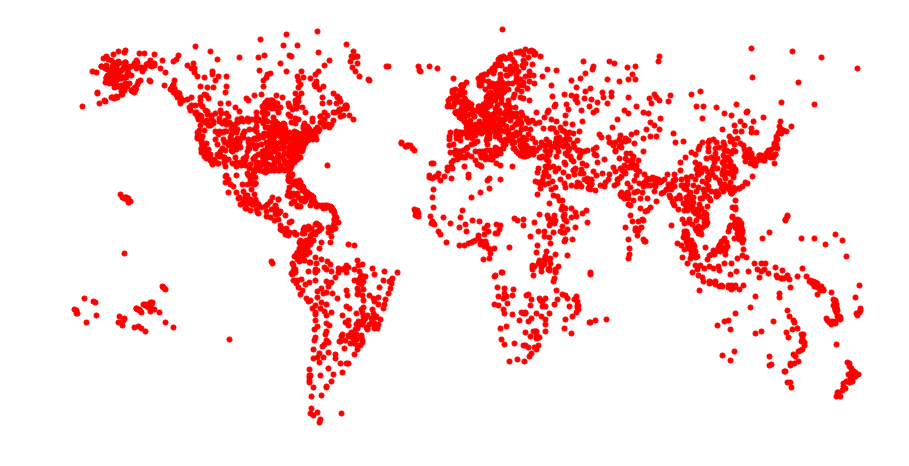

In [48]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=25)

In [24]:
#read in the links between airports
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None)
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [25]:
#create list of edges
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]
edgelist

[('Sao Paulo', 'Rio De Janeiro'),
 ('Rio De Janeiro', 'Sao Paulo'),
 ('Beijing', 'Shanghai'),
 ('Johannesburg', 'Cape Town'),
 ('Honolulu', 'Tokyo'),
 ('Tokyo', 'Honolulu'),
 ('Tokyo', 'Seoul'),
 ('Seoul', 'Tokyo'),
 ('Tokyo', 'Los Angeles'),
 ('Los Angeles', 'Tokyo'),
 ('Shanghai', 'Beijing'),
 ('Hong Kong', 'Bangkok'),
 ('Bangkok', 'Hong Kong'),
 ('Taipei', 'Shanghai'),
 ('Shanghai', 'Taipei'),
 ('Cape Town', 'Johannesburg'),
 ('Kigali', 'Entebbe'),
 ('Shanghai', 'Hong Kong'),
 ('Hong Kong', 'Shanghai'),
 ('Muscat', 'Abu Dhabi'),
 ('New York', 'London'),
 ('Abu Dhabi', 'Muscat'),
 ('Shenzhen', 'Shanghai'),
 ('Shanghai', 'Shenzhen'),
 ('Taipei', 'Tokyo'),
 ('Tokyo', 'Taipei'),
 ('Sao Paulo', 'Belo Horizonte'),
 ('New York', 'Washington'),
 ('Washington', 'New York'),
 ('Qingdao', 'Shanghai'),
 ('Shanghai', 'Qingdao'),
 ('Shanghai', 'Chongqing'),
 ('Chongqing', 'Shanghai'),
 ('Singapore', 'Jakarta'),
 ('Jakarta', 'Singapore'),
 ('Sydney', 'Melbourne'),
 ('Beijing', 'Tokyo'),
 ('Tokyo',

In [26]:
#add edges to the network
Flights.add_edges_from(edgelist)

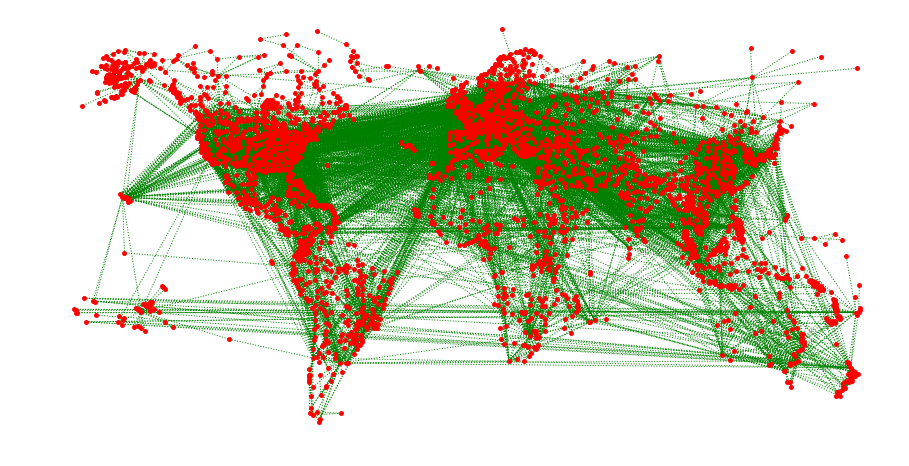

In [27]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [28]:
#most connected airport
AirportDeg=dict(Flights.degree())
TopAirport=AirportDeg.keys()[np.argmax(AirportDeg.values())]
print('Most connected airport is {0} with {1} connections'.format(TopAirport,AirportDeg[TopAirport]))

Most connected airport is London with 311 connections


In [29]:
#least connected airport
LeastAirport=AirportDeg.keys()[np.argmin(AirportDeg.values())]
print('Most connected airport is {0} with {1} connections'.format(LeastAirport,AirportDeg[LeastAirport]))

Most connected airport is Bar Harbor with 1 connections


In [30]:
#compute network average number of connections per airport and network density
k_avg=mean(AirportDeg.values())
dens=k_avg/(len(Flights)-1)
print('Average number of connections per airport is {0}; network density ={1}'.format(k_avg,dens))

Average number of connections per airport is 10.4738955823; network density =0.00350649333188


### Looking for high degree centrality with London

In [31]:
Top20degree=sorted(AirportDeg.values(),reverse=True)[19]
TopNodes=[d for d in Flights if AirportDeg[d]>=Top20degree]

In [32]:
TopNodes

['Newark',
 'Frankfurt',
 'Chicago',
 'Atlanta',
 'Munich',
 'Rome',
 'Dallas-fort Worth',
 'Amsterdam',
 'London',
 'Denver',
 'Istanbul',
 'Toronto',
 'Moscow',
 'Beijing',
 'Dubai',
 'Madrid',
 'New York',
 'Paris',
 'Shanghai',
 'Houston']

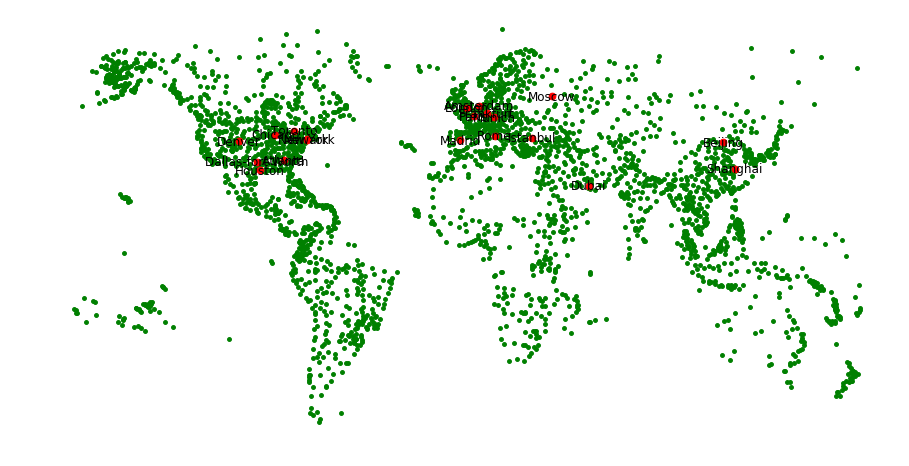

In [34]:
#visualize with labels for the cities
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Flights.subgraph(TopNodes),pos=CityPos,with_labels=True, width=0, node_size=45, node_color='red')

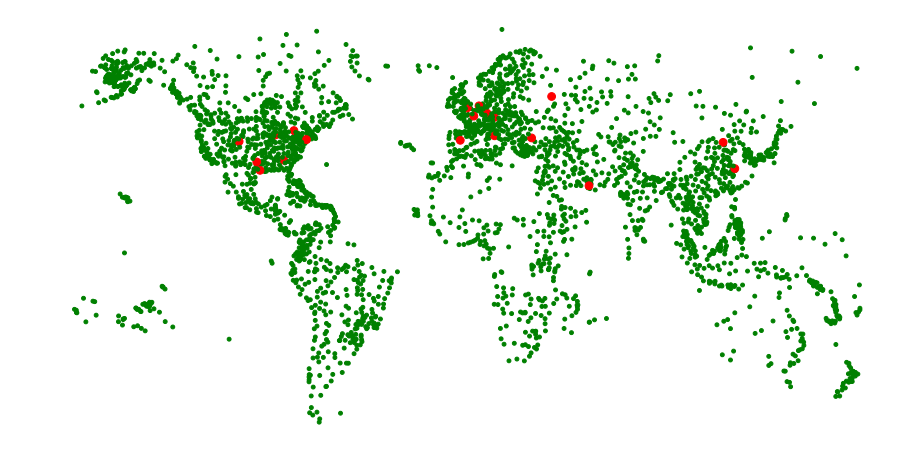

In [35]:
#visualize but size the dots based on degree
Top20degree=sorted(AirportDeg.values(),reverse=True)[19]
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0,
        node_size=[15+45*(AirportDeg[d]>=Top20degree) for d in Flights],
        node_color=['red' if (AirportDeg[d]>=Top20degree) else 'green' for d in Flights]);